#Part I: Data Munging

<b>Data Sources:</b>
<ul>
<li>Inaugural Addresses and States of the Union: Project Gutenberg</li>
<li>[Presidential Data](http://www.infoplease.com/ipa/A0194030.html): Infoplease</li>
<li>[Presidential Rankings](https://en.wikipedia.org/wiki/Historical_rankings_of_Presidents_of_the_United_States#Five_Thirty_Eight_analysis): Wikipedia/538</li>
</ul>

Structured data can be found [here](https://docs.google.com/spreadsheets/d/1cujFV5JLRivY-k6LMEDCP8_zapHUtwNCdb9Qr8h2gOQ/edit#gid=0).

###<i>Step 1: Parsing Speech Text</i>

First, let's import all the packages we'll need to clean the data:
<ul>
<li><code>re</code> for regular expression functions</li>
<li><code>pprint</code> to make printing more readable</li>
<li><code>string</code> to clean string values</li>
<li><code>pandas</code> because <i>duh</i></li>
<li><code>numpy</code> because math</li>
<li><code>matplotlib.pyplot</code> for charts</li>
<li><code>CountVectorizer</code> for parsing tokens and removing stop words</li>
</ul>

In [51]:
%matplotlib inline

import re
import pprint as pp
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

Next, we'll open the text files and read them into Python objects that can be parsed.

In [52]:
# Inaugural Address text
inaugural = open('../data/inaugural.txt', 'r')
inaugural_text = inaugural.read()

# State of the Union text
sotu = open('../data/sotu.txt', 'r')
sotu_text = sotu.read()

First, we'll parse the inaugural speech data using <code>re</code> modules. We'll begin by creating a list of speech titles which will act as speech IDs.

In [53]:
raw_speech_id_list = re.findall(r'\*\s\*\s\*\s\*\s\*([\w\s\,\.]+)ADDRESS',
                                inaugural_text)

We'll use a <code>string</code> method (<code>strip</code>) to remove extraneous characters from the title list first. Later, we'll create a <code>dict</code> object that will have each title as a key and each full speech text as a value.

In [54]:
stripped_id_list = [string.strip(title, "\r\n ") for title in raw_speech_id_list]

Let's move on to cleaning the speech text since we've cleaned the titles.

All the speeches in the text file are separated by \* \* \* \* \* delimiters, so we'll use <code>re.split</code> again to extract all the text between the delimiters.

In [55]:
raw_speech = re.split(r'\*\s\*\s\*\s\*\s\*', inaugural_text)

Next, we'll use <code>re.sub</code> to replace the "Transcriber's Notes" because we only want the speech text for each inaugural address. We'll also ignore the first and last elements in the <code>raw_speech</code> list because it isn't actually speech text.

In [56]:
speeches = [re.sub(r'^([\w\W\s]+)\]', "", speech) for speech in raw_speech[1:len(raw_speech)-1]]

print len(speeches)

55


Finally, we'll use a combination of <code>re.sub</code> and <code>string.strip</code> to clean up all the extra spaces and newline characters in each speech.

In [57]:
clean_speeches = []
[clean_speeches.append(re.sub(r'\r\n',
                              " ",
                              string.strip(speech,
                                           "\r\n"))) 
 for speech in speeches]

print len(clean_speeches)

55


It looks like most of the works is done, but you'll see that the last three speeches still contain extranous test (mostly speech IDs) that should be removed, so we'll take the last use <code>re.sub</code> on the last three to extract the last bit of cruft before moving on.

In [58]:
clean_speeches_inaugural = [re.sub(r'([A-Z0-9\,\.\s]+)\s{3}', "", speech) 
                            for speech in clean_speeches]

Now that the inaugural data is clean, let's follow similar steps to clean the State of the Union (SOTU) speeches. Again, we'll use <code>re</code> modules to extract the text.

First, we'll create a list of titles that will serve as speech IDs. Rather than extracting using Python, however, it'll be easier to just copy and paste the SOTU titles and load it into a Python list :)

In [59]:
raw_speech_id_list_sotu = [
'George Washington, State of the Union Address',
'George Washington, State of the Union Address',
'George Washington, State of the Union Address',
'George Washington, State of the Union Address',
'George Washington, State of the Union Address',
'George Washington, State of the Union Address',
'George Washington, State of the Union Address',
'George Washington, State of the Union Address',
'John Adams, State of the Union Address',
'John Adams, State of the Union Address',
'John Adams, State of the Union Address',
'John Adams, State of the Union Address',
'Thomas Jefferson, State of the Union Address',
'Thomas Jefferson, State of the Union Address',
'Thomas Jefferson, State of the Union Address',
'Thomas Jefferson, State of the Union Address',
'Thomas Jefferson, State of the Union Address',
'Thomas Jefferson, State of the Union Address',
'Thomas Jefferson, State of the Union Address',
'Thomas Jefferson, State of the Union Address',
'James Madison, State of the Union Address',
'James Madison, State of the Union Address',
'James Madison, State of the Union Address',
'James Madison, State of the Union Address',
'James Madison, State of the Union Address',
'James Madison, State of the Union Address',
'James Madison, State of the Union Address',
'James Madison, State of the Union Address',
'James Monroe, State of the Union Address',
'James Monroe, State of the Union Address',
'James Monroe, State of the Union Address',
'James Monroe, State of the Union Address',
'James Monroe, State of the Union Address',
'James Monroe, State of the Union Address',
'James Monroe, State of the Union Address',
'James Monroe, State of the Union Address',
'John Quincy Adams, State of the Union Address',
'John Quincy Adams, State of the Union Address',
'John Quincy Adams, State of the Union Address',
'John Quincy Adams, State of the Union Address',
'Andrew Jackson, State of the Union Address',
'Andrew Jackson, State of the Union Address',
'Andrew Jackson, State of the Union Address',
'Andrew Jackson, State of the Union Address',
'Andrew Jackson, State of the Union Address',
'Andrew Jackson, State of the Union Address',
'Andrew Jackson, State of the Union Address',
'Andrew Jackson, State of the Union Address',
'Martin van Buren, State of the Union Address',
'Martin van Buren, State of the Union Address',
'Martin van Buren, State of the Union Address',
'Martin van Buren, State of the Union Address',
'John Tyler, State of the Union Address',
'John Tyler, State of the Union Address',
'John Tyler, State of the Union Address',
'John Tyler, State of the Union Address',
'James Polk, State of the Union Address',
'James Polk, State of the Union Address',
'James Polk, State of the Union Address',
'James Polk, State of the Union Address',
'Zachary Taylor, State of the Union Address',
'Millard Fillmore, State of the Union Address',
'Millard Fillmore, State of the Union Address',
'Millard Fillmore, State of the Union Address',
'Franklin Pierce, State of the Union Address',
'Franklin Pierce, State of the Union Address',
'Franklin Pierce, State of the Union Address',
'Franklin Pierce, State of the Union Address',
'James Buchanan, State of the Union Address',
'James Buchanan, State of the Union Address',
'James Buchanan, State of the Union Address',
'James Buchanan, State of the Union Address',
'Abraham Lincoln, State of the Union Address',
'Abraham Lincoln, State of the Union Address',
'Abraham Lincoln, State of the Union Address',
'Abraham Lincoln, State of the Union Address',
'Andrew Johnson, State of the Union Address',
'Andrew Johnson, State of the Union Address',
'Andrew Johnson, State of the Union Address',
'Andrew Johnson, State of the Union Address',
'Ulysses S. Grant, State of the Union Address',
'Ulysses S. Grant, State of the Union Address',
'Ulysses S. Grant, State of the Union Address',
'Ulysses S. Grant, State of the Union Address',
'Ulysses S. Grant, State of the Union Address',
'Ulysses S. Grant, State of the Union Address',
'Ulysses S. Grant, State of the Union Address',
'Ulysses S. Grant, State of the Union Address',
'Rutherford B. Hayes, State of the Union Address',
'Rutherford B. Hayes, State of the Union Address',
'Rutherford B. Hayes, State of the Union Address',
'Rutherford B. Hayes, State of the Union Address',
'Chester A. Arthur, State of the Union Address',
'Chester A. Arthur, State of the Union Address',
'Chester A. Arthur, State of the Union Address',
'Chester A. Arthur, State of the Union Address',
'Grover Cleveland, State of the Union Address',
'Grover Cleveland, State of the Union Address',
'Grover Cleveland, State of the Union Address',
'Grover Cleveland, State of the Union Address',
'Benjamin Harrison, State of the Union Address',
'Benjamin Harrison, State of the Union Address',
'Benjamin Harrison, State of the Union Address',
'Benjamin Harrison, State of the Union Address',
'William McKinley, State of the Union Address',
'William McKinley, State of the Union Address',
'William McKinley, State of the Union Address',
'William McKinley, State of the Union Address',
'Theodore Roosevelt, State of the Union Address',
'Theodore Roosevelt, State of the Union Address',
'Theodore Roosevelt, State of the Union Address',
'Theodore Roosevelt, State of the Union Address',
'Theodore Roosevelt, State of the Union Address',
'Theodore Roosevelt, State of the Union Address',
'Theodore Roosevelt, State of the Union Address',
'Theodore Roosevelt, State of the Union Address',
'William H. Taft, State of the Union Address',
'William H. Taft, State of the Union Address',
'William H. Taft, State of the Union Address',
'William H. Taft, State of the Union Address',
'Woodrow Wilson, State of the Union Address',
'Woodrow Wilson, State of the Union Address',
'Woodrow Wilson, State of the Union Address',
'Woodrow Wilson, State of the Union Address',
'Woodrow Wilson, State of the Union Address',
'Woodrow Wilson, State of the Union Address',
'Woodrow Wilson, State of the Union Address',
'Woodrow Wilson, State of the Union Address',
'Warren Harding, State of the Union Address',
'Warren Harding, State of the Union Address',
'Calvin Coolidge, State of the Union Address',
'Calvin Coolidge, State of the Union Address',
'Calvin Coolidge, State of the Union Address',
'Calvin Coolidge, State of the Union Address',
'Calvin Coolidge, State of the Union Address',
'Calvin Coolidge, State of the Union Address',
'Herbert Hoover, State of the Union Address',
'Herbert Hoover, State of the Union Address',
'Herbert Hoover, State of the Union Address',
'Herbert Hoover, State of the Union Address',
'Franklin D. Roosevelt, State of the Union Address',
'Franklin D. Roosevelt, State of the Union Address',
'Franklin D. Roosevelt, State of the Union Address',
'Franklin D. Roosevelt, State of the Union Address',
'Franklin D. Roosevelt, State of the Union Address',
'Franklin D. Roosevelt, State of the Union Address',
'Franklin D. Roosevelt, State of the Union Address',
'Franklin D. Roosevelt, State of the Union Address',
'Franklin D. Roosevelt, State of the Union Address',
'Franklin D. Roosevelt, State of the Union Address',
'Franklin D. Roosevelt, State of the Union Address',
'Franklin D. Roosevelt, State of the Union Address',
'Harry S. Truman, State of the Union Address',
'Harry S. Truman, State of the Union Address',
'Harry S. Truman, State of the Union Address',
'Harry S. Truman, State of the Union Address',
'Harry S. Truman, State of the Union Address',
'Harry S. Truman, State of the Union Address',
'Harry S. Truman, State of the Union Address',
'Harry S. Truman, State of the Union Address',
'Dwight D. Eisenhower, State of the Union Address',
'Dwight D. Eisenhower, State of the Union Address',
'Dwight D. Eisenhower, State of the Union Address',
'Dwight D. Eisenhower, State of the Union Address',
'Dwight D. Eisenhower, State of the Union Address',
'Dwight D. Eisenhower, State of the Union Address',
'Dwight D. Eisenhower, State of the Union Address',
'Dwight D. Eisenhower, State of the Union Address',
'Dwight D. Eisenhower, State of the Union Address',
'John F. Kennedy, State of the Union Address',
'John F. Kennedy, State of the Union Address',
'John F. Kennedy, State of the Union Address',
'Lyndon B. Johnson, State of the Union Address',
'Lyndon B. Johnson, State of the Union Address',
'Lyndon B. Johnson, State of the Union Address',
'Lyndon B. Johnson, State of the Union Address',
'Lyndon B. Johnson, State of the Union Address',
'Lyndon B. Johnson, State of the Union Address',
'Richard Nixon, State of the Union Address',
'Richard Nixon, State of the Union Address',
'Richard Nixon, State of the Union Address',
'Richard Nixon, State of the Union Address',
'Richard Nixon, State of the Union Address',
'Gerald R. Ford, State of the Union Address',
'Gerald R. Ford, State of the Union Address',
'Gerald R. Ford, State of the Union Address',
'Jimmy Carter, State of the Union Address',
'Jimmy Carter, State of the Union Address',
'Jimmy Carter, State of the Union Address',
'Jimmy Carter, State of the Union Address',
'Ronald Reagan, State of the Union Address',
'Ronald Reagan, State of the Union Address',
'Ronald Reagan, State of the Union Address',
'Ronald Reagan, State of the Union Address',
'Ronald Reagan, State of the Union Address',
'Ronald Reagan, State of the Union Address',
'Ronald Reagan, State of the Union Address',
'George H.W. Bush, State of the Union Address',
'George H.W. Bush, State of the Union Address',
'George H.W. Bush, State of the Union Address',
'William J. Clinton, State of the Union Address',
'William J. Clinton, State of the Union Address',
'William J. Clinton, State of the Union Address',
'William J. Clinton, State of the Union Address',
'William J. Clinton, State of the Union Address',
'William J. Clinton, State of the Union Address',
'William J. Clinton, State of the Union Address',
'George W. Bush, State of the Union Address',
'George W. Bush, State of the Union Address',
'George W. Bush, State of the Union Address',
'George W. Bush, State of the Union Address',
'George W. Bush, State of the Union Address',
'George W. Bush, State of the Union Address',
'George W. Bush, State of the Union Address'
]

# Capitalize speech IDs to conform to Inaugural Address data
raw_speech_id_list_sotu_caps = []
[raw_speech_id_list_sotu_caps.append(item.upper()) for item in raw_speech_id_list_sotu]

pp.pprint(raw_speech_id_list_sotu_caps[:2])

['GEORGE WASHINGTON, STATE OF THE UNION ADDRESS',
 'GEORGE WASHINGTON, STATE OF THE UNION ADDRESS']


In [60]:
# Parse out speech IDs and append them to a list
speech_id_list_sotu = []
[speech_id_list_sotu.append(re.findall(r'^(.*?)\sADDRESS',
                                       speech)[0])
 for speech in raw_speech_id_list_sotu_caps]

pp.pprint(speech_id_list_sotu[:2])

['GEORGE WASHINGTON, STATE OF THE UNION',
 'GEORGE WASHINGTON, STATE OF THE UNION']


In [61]:
# Combine the speech IDs into a single list
title_list = stripped_id_list + speech_id_list_sotu

Now we're going to add each president's number to each of the titles in <code>title_list</code>, which will make for easier joining when we add personal details and rankings.

In [62]:
# Write speech DataFrame data to a file
file_df = open('../data/ids.csv', 'w')
for row in title_list:
    file_df.write(row)
    file_df.write('\n')

file_df.close()

Normally, we'd find a way to add the actual order numbers programmatically, but since there are relatively few records in the dataset, we can just do it by hand, then re-upload the CSV with the new values.

In [63]:
# Load newly-tagged data
df_with_id = pd.read_csv('../data/ids_final.csv')
df_with_id.head()

,id,name,speech
0,1,GEORGE WASHINGTON,FIRST INAUGURAL
1,1,GEORGE WASHINGTON,SECOND INAUGURAL
2,2,JOHN ADAMS,INAUGURAL
3,3,THOMAS JEFFERSON,FIRST INAUGURAL
4,3,THOMAS JEFFERSON,SECOND INAUGURAL


The above <code>DataFrame</code> can be concatenated to the later <code>DataFrame</code>s containing the tokens generated by parsing the speech text.

Now for the hard part: let's grab the actual speech text for each State of the Union speech. First, we'll split the full text file; each speech is separated by \*\*\*, so we'll split using that.

In [64]:
raw_speech_sotu = re.split(r'\*\*\*\r\n\r\n', sotu_text)

# Actual speeches start at index 4 and end at index -3
raw_speech_sotu = raw_speech_sotu[4:-3]

To clean things up just a bit more, we'll remove the title information in each speech text.

In [65]:
clean_speeches_2 = []
[clean_speeches_2.append(re.findall(r'[0-9]{4}([\w\W\s\S]+)$',
                            speech)[0])
                            for speech in raw_speech_sotu]

print len(clean_speeches_2)

214


In [66]:
# Still need to clean SOTU speeches and remove '\r\n' instances and replace with '' or spaces
clean_speeches_sotu = []

for speech in clean_speeches_2:
    clean_speeches_sotu.append(re.sub(r'\r\n{1}', ' ', speech))

Now that both sets of speeches have been properly cleaned, we'll add them both together to create an aggregate list of cleaned speeches.

In [67]:
clean_speeches_all = clean_speeches_inaugural + clean_speeches_sotu

####<i>Tokenization with CountVectorizer</i>

We'll create both a unigram and multigram (bigram and trigram) <code>DataFrame</code> for non-stemmed tokens that can be found in the speeches.

We'll also lowercase all the tokens, and ensure that the document frequency is between 10 and 90 percent. Words that appear in fewer than 10 percent of speeches probably aren't relevant, and words that appear in greater than 90 percent are likely stop word-like, so don't add any meaningful context to the speeches.

In [68]:
# Create a unigram vector
unigram_vect = CountVectorizer(decode_error = 'ignore',
                               stop_words = 'english',
                               lowercase = True,
                               max_features = 10000,
                               min_df = 0.1,
                               max_df = 0.9)
unigram_vect.fit(clean_speeches_all)
unigram_raw_feature_names = [token.encode('ascii','ignore') for token in unigram_vect.get_feature_names()]

In [69]:
# Create a multigram (bigram, trigram) vector to cut total number of features
multigram_vect = CountVectorizer(decode_error = 'ignore',
                                 stop_words = 'english',
                                 ngram_range = (2,3),
                                 lowercase = True,
                                 max_features = 10000,
                                 min_df = 0.1,
                                 max_df = 0.9)
multigram_vect.fit(clean_speeches_all)
multigram_raw_feature_names = [token.encode('ascii','ignore') for token in multigram_vect.get_feature_names()]

In [70]:
print len(unigram_raw_feature_names)
print len(multigram_raw_feature_names)

3596
413


Using bigrams and trigrams in conjunction with setting document frequency values results in a feature space about a tenth as large the the space for unigrams only! We'll keep both instances though, since some of the techniques we'll use below seem to be more effective with unigrams, however.

In [71]:
# Create unigram document-term matrix, then unigram DataFrame
unigram_dtm = unigram_vect.transform(clean_speeches_all)
unigram_dtm.toarray()
unigram_df = pd.DataFrame(unigram_dtm.toarray(),
                          columns=unigram_vect.get_feature_names())

# Next, make sure to only include actual words in final DataFrame before adding speech IDs

# Find the index of '90', the last non-word feature
np.where(unigram_df.columns.values == '90') # index: 61

# Concat unigram DataFrame to speech ID DataFrame
unigram_df = pd.concat([df_with_id, unigram_df.iloc[:,62:]], axis=1)

In [72]:
# Create multigram document-term matrix, then multigram DataFrame
multigram_dtm = multigram_vect.transform(clean_speeches_all)
multigram_dtm.toarray()
multigram_df = pd.DataFrame(multigram_dtm.toarray(),
                            columns=multigram_vect.get_feature_names())

# Next, make sure to only include actual word combinations in final DataFrame before adding speech IDs

# Find the index of '500 000', the last non-word feature
np.where(multigram_df.columns.values == '500 000') # index: 13

# Create DataFrame that only contains non-word features
multigram_words_df = multigram_df.iloc[:,14:]

# Concat unigram DataFrame to speech ID DataFrame
multigram_df = pd.concat([df_with_id, multigram_df.iloc[:,14:]], axis=1)

In [73]:
# Create grouped-by DataFrames
# Unigram
unigram_df_id_only = pd.concat([unigram_df.iloc[:,:1], unigram_df.iloc[:,3:]], axis=1)
unigram_df_grouped = unigram_df_id_only.groupby('id', as_index = False).sum()

# Multigram
multigram_df_id_only = pd.concat([multigram_df.iloc[:,:1], multigram_df.iloc[:,3:]], axis=1)
multigram_df_grouped = multigram_df_id_only.groupby('id', as_index = False).sum()

Here we'll upload the personal details and aggregated ranks (as calculated by fivethirtyeight.com) for each president into separate <code>DataFrame</code>s, which we'll join to the newly-grouped by <code>DataFrame</code>s.

In [74]:
# Upload personal details and rankings into DataFrames
df_prez = pd.read_csv('../data/presidents.csv')
df_rankings = pd.read_csv('../data/prez_rankings_538.csv')

# Clean up newly-uploaded DataFrames a bit to only include important columns
df_prez = df_prez[['id', 'party_name', 'religion']]
df_rankings = df_rankings[['id', 'rank_aggregate']]

In [75]:
# Join df_prez and df_rankings to grouped DataFrames to create "master" DataFrames (*_df_all)
unigram_df_all = pd.merge(pd.merge(unigram_df_grouped, df_prez, on="id", how="left", left_index=True), df_rankings, on="id", how="left", left_index=True)
multigram_df_all = pd.merge(pd.merge(multigram_df_grouped, df_prez, on="id", how="left", left_index=True), df_rankings, on="id", how="left", left_index=True)

####<i>Topic Clustering with Latent Dirichlet Allocation (LDA)</i>

In [76]:
# Import LDA module
import lda

# Turn the DataFrame into a matrix of numpy arrays, will serve as X in LDA
unigram_df_matrix = unigram_df.as_matrix(columns=unigram_df.columns.values[3:])

# Create new instance of LDA that will group into 20 topics
# and cycle through 1000 iterations
unigram_model = lda.LDA(n_topics=20, n_iter=1000, random_state=1)
unigram_model.fit(unigram_df_matrix)
unigram_topic_word = unigram_model.topic_word_
unigram_n_top_words = 8

#Note: word_list was generated in the above section on stemming
for i, topic_dist in enumerate(unigram_topic_word):
    unigram_topic_words = unigram_df.columns.values[3:][np.argsort(topic_dist)][:-unigram_n_top_words:-1]
    print('Topic {}: {}'.format(i + 1, ' '.join(unigram_topic_words)))

Topic 1: shall right action purpose means law present
Topic 2: constitution congress union state shall president present
Topic 3: world freedom free hope life know make
Topic 4: program year economic federal million billion dollars
Topic 5: congress world administration policy development international years
Topic 6: law department commerce court american officers work
Topic 7: present year necessary session commerce means debt
Topic 8: federal legislation business agriculture present agricultural large
Topic 9: america american americans children year work let
Topic 10: congress mexico treaty minister treasury act american
Topic 11: security growth energy years soviet programs federal
Topic 12: congress report subject secretary year legislation consideration
Topic 13: general state laws attention service law importance
Topic 14: shall union fellow rights powers principles institutions
Topic 15: year fiscal expenditures general june increase service
Topic 16: treaty republic convention

In [77]:
# TODO: doc_topic_ mapping --> perhaps move to EDA section

In [78]:
# Turn the DataFrame into a matrix of numpy arrays, will serve as X in LDA
multigram_df_matrix = multigram_df.as_matrix(columns=multigram_df.columns.values[3:])

# Create new instance of LDA that will group into 20 topics
# and cycle through 1000 iterations
multigram_model = lda.LDA(n_topics=20, n_iter=1000, random_state=1)
multigram_model.fit(multigram_df_matrix)
multigram_topic_word = multigram_model.topic_word_
multigram_n_top_words = 5

#Note: word_list was generated in the above section on stemming
for i, topic_dist in enumerate(multigram_topic_word):
    multigram_topic_words = multigram_df.columns.values[3:][np.argsort(topic_dist)][:-multigram_n_top_words:-1]
    print('Topic {}: {}'.format(i + 1, ' '.join(multigram_topic_words)))

Topic 1: fellow citizens general government constitution united states constitution united
Topic 2: past year house representatives self government time time
Topic 3: national government interstate commerce supreme court self government
Topic 4: fiscal year civil service past year district columbia
Topic 5: session congress act congress french government present year
Topic 6: army navy national defense recommend congress state union
Topic 7: june 30 ending june ending june 30 fiscal year
Topic 8: great britain fellow citizens public debt house representatives
Topic 9: general government public money federal government public service
Topic 10: federal government state local world war men women
Topic 11: health care american people social security years ago
Topic 12: great britain department state government united states government united
Topic 13: fiscal year present fiscal present fiscal year public debt
Topic 14: fellow citizens people united states people united branch government
To

####<i>Stemming with PorterStemmer</i>

In [79]:
# Next is exploring PorterStemmer. Note that PorterStemmer can only work on a list of unigrams.

# Import PorterStemmer
from nltk.stem.porter import PorterStemmer

# Instantiate a new PorterStemmer object
ps = PorterStemmer()

# Create Python list of tokens in DataFrame
word_list = list(unigram_vect.get_feature_names())

# Use PorterStemmer to stem the tokens
stems = [ps.stem(token) for token in word_list]
stems_set = set(stems) # This reduces the number of elements from the original 3596 unigrams
stems_list = list(stems_set)

print len(stems_list)

2226


In [80]:
# How do I count the occurrence of each stem in each speech?
test_speech = str.split(clean_speeches_all[0])
counter = 0
stems_holder = []

for stem in stems_list:
    for word in test_speech:
        if stem == ps.stem(word):
#            print stem + ': ' + ps.stem(word)
            counter += 1
            stems_holder.append(stem)

print counter

# Note: Checking for stems in each speech doesn't work effectively
# It might be better to create a dictionary of all the available stems for all speeches,
#   then use ps.stem() on each word in each speech, then compare each generated stem to the stem dictionary

398


####<i>Word Relevance Using TF-IDF Analysis</i>

In [81]:
# Import TfidfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

# Unigram tf-idf
tfidf_vect = TfidfVectorizer(decode_error = 'ignore',
                             stop_words = 'english',
                             lowercase = True,
                             max_features = 10000,
                             min_df = 0.1,
                             max_df = 0.9)
tfidf_output = tfidf_vect.fit_transform(clean_speeches_all)

# Turn matrix into a DataFrame
tfidf_df = pd.DataFrame(tfidf_output.toarray(),
                        columns=tfidf_vect.get_feature_names())

#Part II: Exploratory Data Analysis (EDA)

####<i>Presidential Plots</i>

In this section, we'll use aggregate functions to explore and plot the data in order to see if we can coax out any potential trends in the data before applying any models.

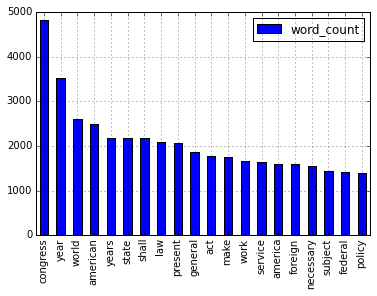

In [82]:
# Visualize the most commonly-used unigrams in aggregate
unigram_df_counts = pd.DataFrame(unigram_df.iloc[:,3:].apply(np.sum, axis=0), columns=['word_count'])
unigram_df_counts_sorted = unigram_df_counts.sort(['word_count'], ascending = [0])[:20]

unigram_df_counts_sorted.plot(kind='bar')

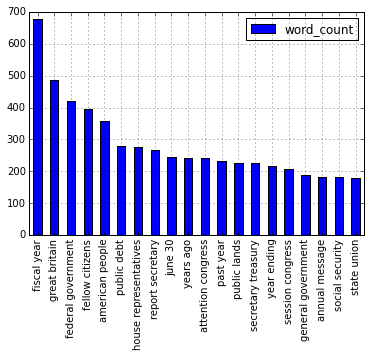

In [83]:
# Visualize the most commonly-used multigrams in aggregate
multigram_df_counts = pd.DataFrame(multigram_df.iloc[:,3:].apply(np.sum, axis=0), columns=['word_count'])
multigram_df_counts_sorted = multigram_df_counts.sort(['word_count'], ascending = [0])[:20]

multigram_df_counts_sorted.plot(kind='bar')

In [84]:
# Group unigram DataFrame values by religion, then visualize most used unigrams by each religious affiliation

# First use groupby to create word counts by religion
unigram_df_religion = unigram_df_all.groupby('religion_y').sum()
unigram_df_religion = unigram_df_religion.iloc[:, 1:-1]
unigram_df_religion

# Find the most used words by religious affiliation
print unigram_df_religion.idxmax(axis=1)

religion_y
Baptist                   world
Congregationalist      congress
Deist                     shall
Disciples of Christ     america
Episcopalian           congress
Methodist              congress
Presbyterian           congress
Quaker                 congress
Reformed Dutch              law
Roman Catholic            world
Southern Baptist          world
Unitarian              congress
dtype: object


In [85]:
# Group multigram DataFrame values by religion, then visualize most used unigrams by each religious affiliation

# First use groupby to create word counts by religion
multigram_df_religion = multigram_df_all.groupby('religion').sum()
multigram_df_religion = multigram_df_religion.iloc[:, 1:-1]
multigram_df_religion

# Find the most used words by religious affiliation
print multigram_df_religion.idxmax(axis=1)

religion
Baptist                        fiscal year
Congregationalist       federal government
Deist                      fellow citizens
Disciples of Christ        american people
Episcopalian                 great britain
Methodist                      fiscal year
Presbyterian                   fiscal year
Quaker                  federal government
Reformed Dutch         national government
Roman Catholic              united nations
Southern Baptist              human rights
Unitarian                    great britain
dtype: object


In [86]:
# NOTE: The multigram results above are interesting, and are more telling than the unigram results

In [87]:
# Group unigram DataFrame values by party, then visualize most used unigrams by each party

# First use groupby to create word counts by party
unigram_df_party = unigram_df_all.groupby('party_name').sum()
unigram_df_party = unigram_df_party.iloc[:, 1:-1]

# Find the most used words by religious affiliation
print unigram_df_party.idxmax(axis=1)

party_name
Democratic                   congress
Democratic Republican        congress
Federalist                      shall
Republican                   congress
Union                    constitution
Whig                         congress
dtype: object


In [88]:
# Group multigram DataFrame values by party, then visualize most multigrams by each party

# First use groupby to create word counts by party
multigram_df_party = multigram_df_all.groupby('party_name').sum()
multigram_df_party = multigram_df_party.iloc[:, 1:-1]

# Find the most used words by religious affiliation
print multigram_df_party.idxmax(axis=1)

party_name
Democratic                         fiscal year
Democratic Republican          fellow citizens
Federalist               house representatives
Republican                         fiscal year
Union                              fiscal year
Whig                             great britain
dtype: object


In [89]:
# NOTE: The multigram results above are also interesting, and are also more telling than the unigram results

####(Optional) Word Clouds

####<i>LDA Revisited, Topic by President</i>

In this section, we're going to try LDA again, but this time, instead of at the individual speech level, we'll apply LDA at the president level to try and glean latent topics by president by looking for each president's top <code>doc\_topic\_</code>.

In [90]:
# Turn the DataFrame into a matrix of numpy arrays, will serve as X in LDA
unigram_df_grouped_matrix = unigram_df_all[1:-3].as_matrix(columns=unigram_df_all.columns.values[1:-3])

# Create new instance of LDA that will group into 20 topics
# and cycle through 1000 iterations
unigram_grouped_model = lda.LDA(n_topics=20, n_iter=1000, random_state=1)
unigram_grouped_model.fit(unigram_df_grouped_matrix)
unigram_grouped_topic_word = unigram_grouped_model.topic_word_
unigram_grouped_n_top_words = 8

#Note: word_list was generated in the above section on stemming
for i, topic_dist in enumerate(unigram_grouped_topic_word):
    unigram_grouped_topic_words = unigram_df_all.columns.values[1:-3][np.argsort(topic_dist)][:-unigram_grouped_n_top_words:-1]
    print('Topic {}: {}'.format(i, ' '.join(unigram_grouped_topic_words)))

Topic 0: congress law subject department year laws report
Topic 1: men work business law man labor far
Topic 2: congress state act president shall territory american
Topic 3: congress british foreign act intercourse session france
Topic 4: federal congress years administration policy world past
Topic 5: action expenditures fiscal service labor present special
Topic 6: consideration interests commercial attention rights american view
Topic 7: america american americans years help let year
Topic 8: american international department foreign tariff court conference
Topic 9: world freedom know american future today history
Topic 10: force commerce millions powers spain progress tribes
Topic 11: state character important necessary duties subject means
Topic 12: year economic world program security free million
Topic 13: present general given best measure information operation
Topic 14: large agriculture economic construction business necessary production
Topic 15: constitution union duty rig

In [95]:
unigram_df_all.head()

,id,abandon,abandoned,abiding,ability,able,abolished,abolition,abroad,absence,...,yes,yield,yielding,york,young,youth,zeal,party_name,religion_y,rank_aggregate
2,1,0,1,0,2,9,0,0,4,0,...,0,2,0,1,0,2,3,Federalist,Episcopalian,3
15,2,2,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,2,Federalist,Unitarian,16
4,3,1,1,0,0,9,1,1,8,0,...,0,1,0,3,0,0,5,Democratic Republican,Deist,5
14,4,0,1,0,2,3,0,0,4,1,...,0,2,3,4,0,1,5,Democratic Republican,Episcopalian,15
13,5,6,2,0,3,9,0,1,2,0,...,0,2,3,4,0,2,6,Democratic Republican,Episcopalian,14


In [94]:
# TODO: Need to fix this - throws error at 38 for some reason...

prez_ids = unigram_df_all['id']

# Find the most prevalent topic among each president's collection of speeches
doc_topic = unigram_grouped_model.doc_topic_
for i in range(len(unigram_df_all)):
    print("{} (top topic: {})".format(prez_ids[i], doc_topic[i].argmax()))

16 (top topic: 3)
32 (top topic: 3)
1 (top topic: 3)
26 (top topic: 10)
3 (top topic: 3)
33 (top topic: 11)
28 (top topic: 11)
34 (top topic: 15)
35 (top topic: 17)
40 (top topic: 18)
11 (top topic: 0)
36 (top topic: 0)
7 (top topic: 15)
5 (top topic: 2)
4 (top topic: 0)
2 (top topic: 0)


KeyError: 16

#Part III: Training and Testing Models

Before using any of the models, let's split our data into training and testing data that we can then run through the models:

In [126]:
# Import package containing LabelEncoder
from sklearn import preprocessing

# Create new instance of LabelEncoder for each outcome label
unigram_le_party = preprocessing.LabelEncoder()
unigram_le_party.fit_transform(unigram_df_all['party_name'])
unigram_df_all['party_name'] = unigram_le_party.fit_transform(unigram_df_all['party_name'])

multigram_le_party = preprocessing.LabelEncoder()
multigram_le_party.fit_transform(multigram_df_all['party_name'])
multigram_df_all['party_name'] = multigram_le_party.fit_transform(multigram_df_all['party_name'])

unigram_le_religion = preprocessing.LabelEncoder()
unigram_le_religion.fit_transform(unigram_df_all['religion_y'])
unigram_df_all['religion_y'] = unigram_le_religion.fit_transform(unigram_df_all['religion_y'])

multigram_le_religion = preprocessing.LabelEncoder()
multigram_le_religion.fit_transform(multigram_df_all['religion'])
multigram_df_all['religion'] = multigram_le_religion.fit_transform(multigram_df_all['religion'])

In [130]:
# Import test_train_split
from sklearn.cross_validation import train_test_split

# Split unigram data
u_X_train, u_X_test, u_y_train, u_y_test = train_test_split(unigram_df_all.iloc[:,1:-3], # unigram tokens
                                                            unigram_df_all.iloc[:,-2:-1], # 'party_name' column
                                                            random_state = 1)

# Split multigram data
m_X_train, m_X_test, m_y_train, m_y_test = train_test_split(multigram_df_all.iloc[:,1:-3], # multigram tokens
                                                            multigram_df_all.iloc[:,-2:-1], # 'party_name' column
                                                            random_state = 1)

####<i>Implementing Naïve Bayes</i>

In [136]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Train a Naive Bayes model using u_X_train
u_nb = MultinomialNB()
u_nb.fit(u_X_train, u_y_train)

# Make predictions on test data using u_X_test
u_preds = u_nb.predict(u_X_test)

# Compare predictions to true labels
print metrics.accuracy_score(u_y_test, u_preds)
print metrics.confusion_matrix(u_y_test, u_preds)

0.0909090909091
[[0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2]
 [0 0 0 0 0 0 0 0 0 0 2]
 [0 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]


/home/ubuntu/anaconda/lib/python2.7/site-packages/sklearn/naive_bayes.py:301: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [137]:
# Train a Naive Bayes model using m_X_train
m_nb = MultinomialNB()
m_nb.fit(m_X_train, m_y_train)

# Make predictions on test data using m_X_test
m_preds = m_nb.predict(m_X_test)

# Compare predictions to true labels
print metrics.accuracy_score(m_y_test, m_preds)
print metrics.confusion_matrix(m_y_test, m_preds)

0.0909090909091
[[0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2]
 [0 0 0 0 0 2 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


/home/ubuntu/anaconda/lib/python2.7/site-packages/sklearn/naive_bayes.py:301: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# TODO 1: Both instances of the model above are returning the same accuracy scores, so something has to be up.
#         Maybe it's the way I split the dataset?
# TODO 2: Also, I've only done it for party, and not for religion yet.

#Part IV: Using Outside Data

####The West Wing <i>Data</i>

####<i>President Barack Obama's Speeches</i>